# Importacion de librerias


In [100]:
import numpy as np
import pandas as pd
import statsmodels.api as sn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Lectura de datos


In [101]:
data = pd.read_csv('stores_sales_group_2.csv')
data.head()

,store_id,store_area,items_available,number_of_customers_who_visited_to_stores,store_sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


# Verificación caracteristicas del dataset


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   store_id                                   896 non-null    int64
 1   store_area                                 896 non-null    int64
 2   items_available                            896 non-null    int64
 3   number_of_customers_who_visited_to_stores  896 non-null    int64
 4   store_sales                                896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


# Verificación datos faltantes


In [103]:
data.isnull().mean() * 100

store_id                                     0.0
store_area                                   0.0
items_available                              0.0
number_of_customers_who_visited_to_stores    0.0
store_sales                                  0.0
dtype: float64

# Verificar valores atipicos en cada columna


In [104]:
# Especifica la columna que deseas verificar
column_to_check = 'store_area'  # Reemplaza con el nombre de tu columna

# Estadísticas descriptivas
describe_stats = data[column_to_check].describe()

# Identificar valores atípicos basados en un umbral (puedes ajustar el umbral según tus necesidades)
umbral_atipico = 1.5
outliers = data[data[column_to_check] > describe_stats['75%'] +
                umbral_atipico * (describe_stats['75%'] - describe_stats['25%'])]

# Imprimir el encabezado y los valores atípicos
print(f'Valores atípicos en {column_to_check}:')
print(outliers.to_string(index=False))


# Especifica la columna que deseas verificar
column_to_check = 'items_available'  # Reemplaza con el nombre de tu columna

# Estadísticas descriptivas
describe_stats = data[column_to_check].describe()

# Identificar valores atípicos basados en un umbral (puedes ajustar el umbral según tus necesidades)
umbral_atipico = 1.5
outliers = data[data[column_to_check] > describe_stats['75%'] +
                umbral_atipico * (describe_stats['75%'] - describe_stats['25%'])]

# Imprimir el encabezado y los valores atípicos
print(f'Valores atípicos en {column_to_check}:')
print(outliers.to_string(index=False))


# Especifica la columna que deseas verificar
# Reemplaza con el nombre de tu columna
column_to_check = 'number_of_customers_who_visited_to_stores'

# Estadísticas descriptivas
describe_stats = data[column_to_check].describe()

# Identificar valores atípicos basados en un umbral (puedes ajustar el umbral según tus necesidades)
umbral_atipico = 1.5
outliers = data[data[column_to_check] > describe_stats['75%'] +
                umbral_atipico * (describe_stats['75%'] - describe_stats['25%'])]

# Imprimir el encabezado y los valores atípicos
print(f'Valores atípicos en {column_to_check}:')
print(outliers.to_string(index=False))


# Especifica la columna que deseas verificar
column_to_check = 'store_sales'  # Reemplaza con el nombre de tu columna

# Estadísticas descriptivas
describe_stats = data[column_to_check].describe()

# Identificar valores atípicos basados en un umbral (puedes ajustar el umbral según tus necesidades)
umbral_atipico = 1.5
outliers = data[data[column_to_check] > describe_stats['75%'] +
                umbral_atipico * (describe_stats['75%'] - describe_stats['25%'])]

# Imprimir el encabezado y los valores atípicos
print(f'Valores atípicos en {column_to_check}:')
print(outliers.to_string(index=False))

Valores atípicos en store_area:
 store_id  store_area  items_available  number_of_customers_who_visited_to_stores  store_sales
       92        2169             2617                                        600        67080
      467        2229             2667                                        660        87410
      541        2214             2647                                        740        65900
Valores atípicos en items_available:
 store_id  store_area  items_available  number_of_customers_who_visited_to_stores  store_sales
       92        2169             2617                                        600        67080
      467        2229             2667                                        660        87410
      541        2214             2647                                        740        65900
Valores atípicos en number_of_customers_who_visited_to_stores:
 store_id  store_area  items_available  number_of_customers_who_visited_to_stores  store_sales
      350    

# Calcular la matriz de correlación


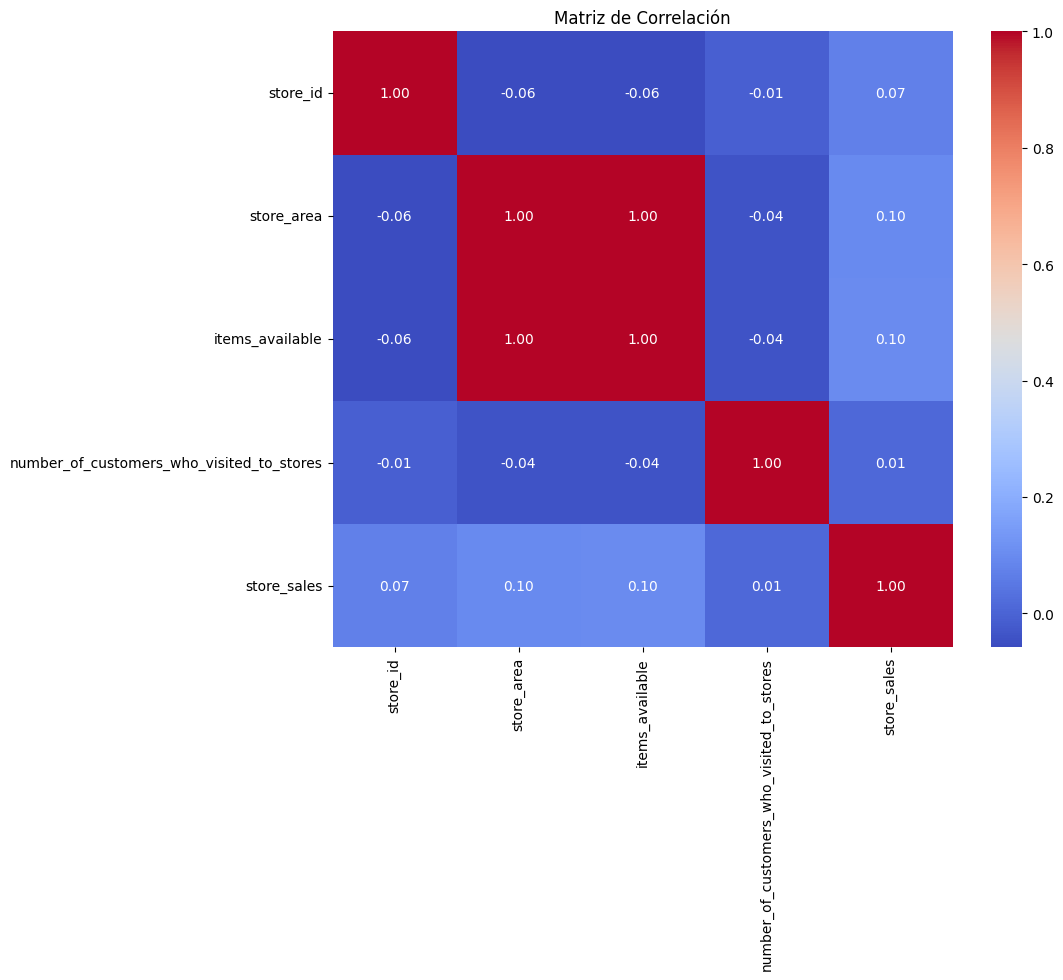

In [105]:
correlation_matrix = data.corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Grafica de dispersión entre store area e items available para verificar la correlación entre estas 2 columnas


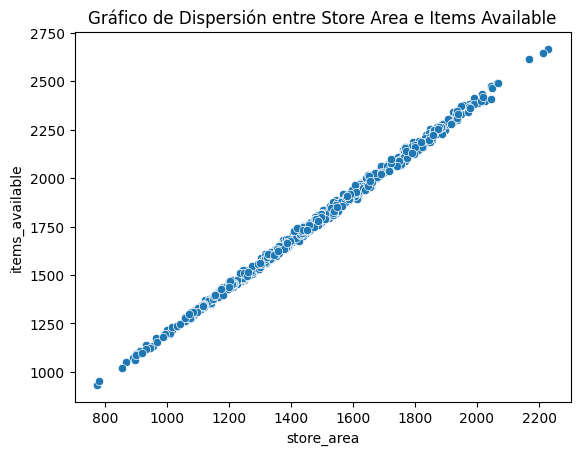

In [106]:
# Crear un gráfico de dispersión
sns.scatterplot(x='store_area', y='items_available', data=data)
plt.title('Gráfico de Dispersión entre Store Area e Items Available')
plt.show()

In [107]:
# Tratamos de predecir la importancia de las caracteristicas para la prediccion de las ventas
# Dividir los datos en características (X) y la variable a predecir (y)
X = data[['store_id', 'store_area', 'items_available',
          'number_of_customers_who_visited_to_stores']]
y = data['store_sales']

# Inicializar el modelo de Random Forest
model = RandomForestRegressor()

# Entrenar el modelo
model.fit(X, y)

# Obtener la importancia de las características
feature_importances = model.feature_importances_

# Mostrar la importancia de las características
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importances[i]}")

store_id: 0.33498911731716186
store_area: 0.20572984300478858
items_available: 0.21596477701485134
number_of_customers_who_visited_to_stores: 0.2433162626631982


# Histogramas para variables numéricas


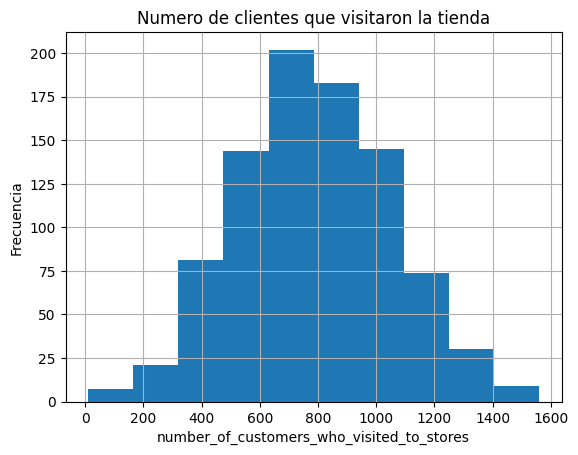

In [108]:
data['number_of_customers_who_visited_to_stores'].hist()
plt.xlabel('number_of_customers_who_visited_to_stores')
plt.ylabel('Frecuencia')
plt.title('Numero de clientes que visitaron la tienda')
plt.show()

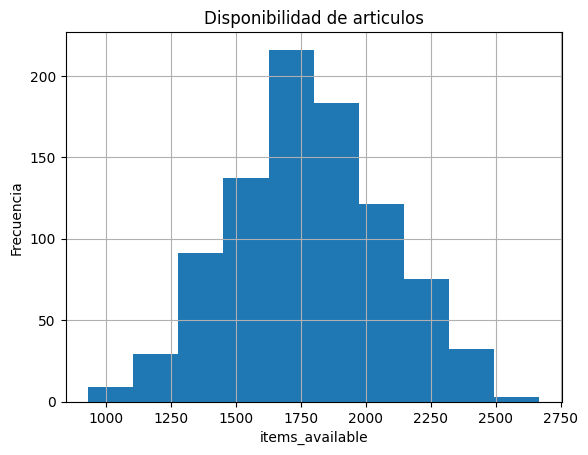

In [109]:
data['items_available'].hist()
plt.xlabel('items_available')
plt.ylabel('Frecuencia')
plt.title('Disponibilidad de articulos')
plt.show()

# Graficamos la relacion entre las dos caracteristicas con mayor importancia


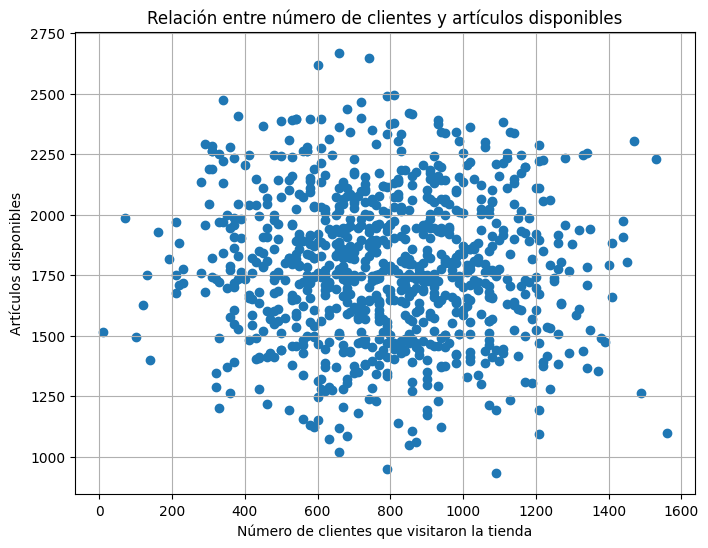

In [110]:
plt.figure(figsize=(8, 6))

plt.scatter(data['number_of_customers_who_visited_to_stores'],
            data['items_available'])
plt.xlabel('Número de clientes que visitaron la tienda')
plt.ylabel('Artículos disponibles')
plt.title('Relación entre número de clientes y artículos disponibles')

plt.grid(True)
plt.show()

# Red Neuronal Feedforward para Regresión


Epoch 1/50
12/12 [==============================] - 1s 16ms/step - loss: 0.8985 - val_loss: 0.9825
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.7273 - val_loss: 0.7794
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.5735 - val_loss: 0.5811
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.4318 - val_loss: 0.3981
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.2854 - val_loss: 0.2554
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1725 - val_loss: 0.1647
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1120 - val_loss: 0.1264
Epoch 8/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0745 - val_loss: 0.0829
Epoch 9/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0557 - val_loss: 0.0920
Epoch 10/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0490 - val_loss: 0.0638
Epoch 11/50
12/12 

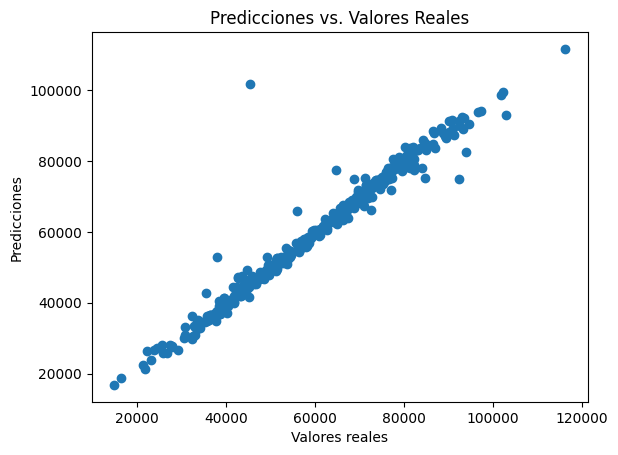

MAE (Error Absoluto Medio): 1379.55 unidades en la escala original
MSE (Error Cuadrático Medio): 11954469.48 unidades^2 en la escala original
R² (Coeficiente de Determinación): 0.9595 (varía entre 0 y 1; cuanto más cerca de 1, mejor)


In [127]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Ingeniería de Características
data['sales_to_customers_ratio'] = data['store_sales'] / \
    data['number_of_customers_who_visited_to_stores']
data['area_times_items'] = data['store_area'] * data['items_available']

# Normalizar la variable objetivo
scaler_target = StandardScaler()
data['store_sales_normalized'] = scaler_target.fit_transform(
    data['store_sales'].values.reshape(-1, 1))

# Seleccionar características y variable objetivo
features = data[['store_area', 'items_available', 'number_of_customers_who_visited_to_stores',
                 'sales_to_customers_ratio', 'area_times_items']]
target = data['store_sales_normalized']

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.5, random_state=42)

# Escalar características para modelos sensibles a la escala
scaler_features = StandardScaler()
X_train_scaled = scaler_features.fit_transform(X_train)
X_test_scaled = scaler_features.transform(X_test)

# Construir el modelo de red neuronal
model = Sequential()
model.add(Dense(128, activation='relu',
          input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=50,
          batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
mse = model.evaluate(X_test_scaled, y_test)
print(f'Mean Squared Error on Test Data: {mse}')


# Predecir en el conjunto de prueba
predictions_normalized = model.predict(X_test_scaled)

# Desnormalizar las predicciones
predictions = scaler_target.inverse_transform(predictions_normalized)

# Desnormalizar los valores reales
y_test_original = scaler_target.inverse_transform(y_test.values.reshape(-1, 1))

# Graficar las predicciones vs. valores reales
plt.scatter(y_test_original, predictions)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()


# Desnormalizar las predicciones
predictions_original = scaler_target.inverse_transform(predictions_normalized)

# Calcular métricas
mae = mean_absolute_error(y_test_original, predictions_original)
mse = mean_squared_error(y_test_original, predictions_original)
r2 = r2_score(y_test_original, predictions_original)

# Muestra los resultados
print(f'MAE (Error Absoluto Medio): {mae:.2f} unidades en la escala original')
print(
    f'MSE (Error Cuadrático Medio): {mse:.2f} unidades^2 en la escala original')
print(
    f'R² (Coeficiente de Determinación): {r2:.4f} (varía entre 0 y 1; cuanto más cerca de 1, mejor)')

# REGRESION LINEAL


In [111]:
# Dividir los datos en características (X) y la variable a predecir (y)
X = data[['store_id', 'store_area', 'items_available',
          'number_of_customers_who_visited_to_stores']]
y = data['store_sales']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, predictions)
print(f"Error cuadrático medio (MSE): {mse}")
predictions

Error cuadrático medio (MSE): 271673841.05819917


array([59697.20187235, 61109.71465556, 55672.72327574, 63291.41268983,
       55527.06646758, 55273.0035375 , 59222.03244302, 59409.70871559,
       59372.84470885, 58554.83276766, 58159.65827974, 58847.27569419,
       61506.56862239, 55456.50512047, 62099.3202362 , 62583.4800515 ,
       57342.81469077, 58369.04681134, 62536.95256881, 54288.23852226,
       58167.10648288, 58290.15773107, 57561.17827774, 61681.44159283,
       60536.6438112 , 61067.70789651, 56534.70825878, 61993.26100853,
       55382.20788166, 60439.19085227, 60065.32557696, 59144.00051082,
       61061.40735201, 59590.77020852, 58139.58117952, 59861.03966547,
       56707.19260546, 57872.11139258, 61719.74340148, 61522.04103994,
       56812.21878098, 61551.19095133, 64503.14667016, 61015.3751144 ,
       59317.22644152, 60638.57934929, 56440.21582751, 57347.23534644,
       56660.88594832, 63313.25982555, 60332.5304606 , 63908.03274118,
       60328.70587145, 63726.10365941, 56494.80075764, 58658.80932318,
      

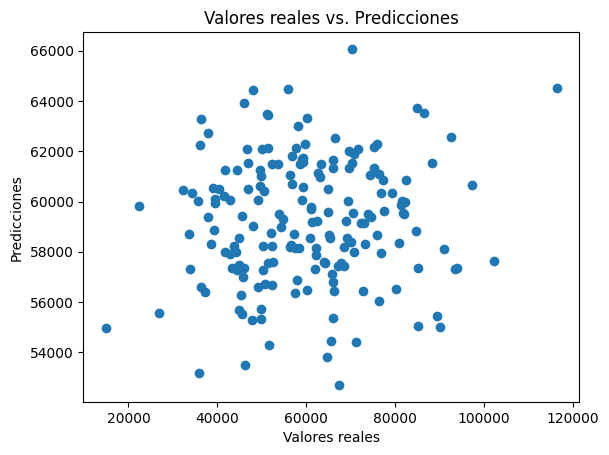

In [112]:
# Graficar valores reales vs. predicciones
plt.scatter(y_test, predictions)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs. Predicciones')
plt.show()

# REGRESION DE BOSQUES ALE


In [130]:

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 303146956.376
R-squared: -0.11431463448968837
